# Build data with proposition (main)

In [1]:
import sys
sys.path.append("../..")
from datasets import load_dataset
from src.service.provider import ProviderService

provider = ProviderService()

provider.config.enable_tracing(project="CODEBOT")

In [2]:
DATA_REPO = "BroDeadlines/TEST.UEH.ueh_copora_data"
# SUBSET = ""
# SUBSET = "duplicate"

test_dataset = load_dataset(DATA_REPO)
test_dataset

Generating train split:   0%|          | 0/196 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'doc_id', 'metadata', 'split', 'shards', 'propositions', 'proposition_list', '__index_level_0__'],
        num_rows: 196
    })
})

In [3]:
# qas = test_dataset.filter(lambda e: len(e['metadata']) > 0 and e['doc_id'] in DOS)
qas = test_dataset.filter(lambda e: len(e['metadata']) > 0)
qas

Filter:   0%|          | 0/196 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'doc_id', 'metadata', 'split', 'shards', 'propositions', 'proposition_list', '__index_level_0__'],
        num_rows: 54
    })
})

In [5]:
lengths = []
def count_len(row):
    lengths.append(len(row['content']))
    return

contents = []
def get_content(row):
    contents.append(row['content'])
    return

test_dataset.map(get_content)
len(lengths)
len(contents)

Map:   0%|          | 0/257 [00:00<?, ? examples/s]

257

In [8]:
from src.utils.text_utils import create_splitter, try_split_texts, window_slide_chunks
from src.chain.proposition import create_proposition_chain, create_proposition_chain_openai

splitter = create_splitter(chunk_size=800, overlap=50)
proponizer = create_proposition_chain(provider=provider)
a, b, lengths = try_split_texts(texts=contents, splitter=splitter)
# a

From 257 texts -> 383
Distribution: Counter({1: 177, 2: 45, 3: 19, 4: 11, 5: 3, 0: 2})
== About the splits ==
The mean of the splits is: 1.490272373540856
The median of the splits is: 1.0
The max of the split is: 5
The min of the split is: 0
== About the splits length ==
The max of the split length is: 779
The min of the split length is: 8
The mean of the split length is: 401.0704960835509
The median of the split length is: 382.0


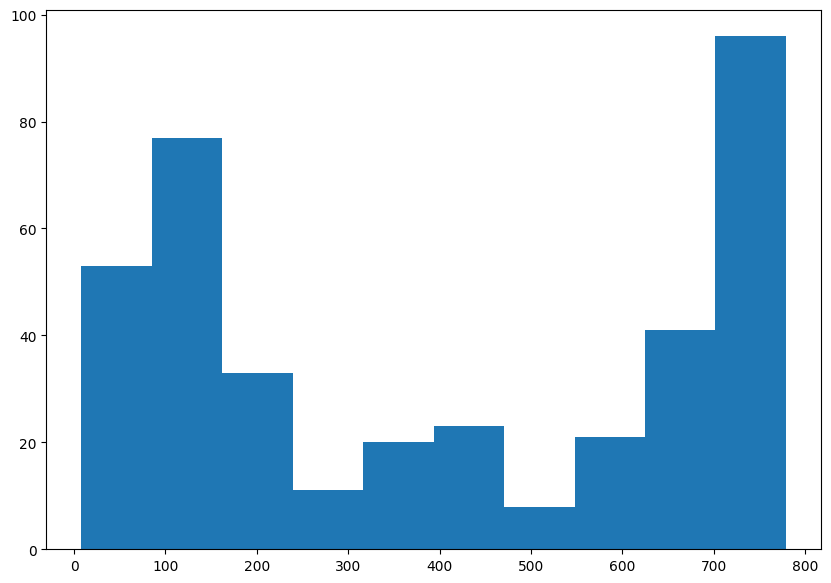

In [9]:
from matplotlib import pyplot as plt 
fig = plt.figure(figsize =(10, 7))
plt.hist(lengths)
plt.show()

In [10]:
splitter._separators

['\n\n\n', '\n\n', '\n', '.']

In [9]:
aa = 'CLB tiếng Anh | Khoa Ngoại Ngữ Nhảy đến nội dung Đại học Tôn Đức Thắng  English | 中文 Khoa Ngoại Ngữ Main navigation Giới thiệu Đào tạo Nghiên cứu Hợp tác quốc tế Doanh nghiệp Tuyển sinh Giảng viên/Viên chức  Sinh viên  Cựu sinh viên Search CLB tiếng Anh CÂU LẠC BỘ TIẾNG ANH - A.C.E  A.C.E - "Ambitious - Curious - Energetic" (Khát vọng - Hiếu kỳ - Năng động) 1. Giới thiệu:  Câu lạc bộ tiếng Anh được thành lập vào ngày 21/12/2008, là điểm hẹn cho những ai yêu thích thực hành tiếng Anh, nơi gặp gỡ, giao lưu, kết bạn và môi trường chủ động rèn luyện kỹ năng và tổ chức sự kiện.  Tiếp nối sự thành công của câu lạc bộ tiền nhiệm - L.E.O (Leading English Organization), A.C.E được thành lập vào năm học 2023-2024 để tiếp tục phát triển những giá trị mà L.E.O đã mang lại.  A.C.E với bộ nhận diện mới, tên gọi mới, logo mới, màu sắc mới sẽ tạo nên một môi trường vừa học vừa chơi mới mẻ và sáng tạo để các sinh viên Trường Đại học Tôn Đức Thắng nói chung và sinh viên khoa Ngoại ngữ nói riêng có thể trau dồi vốn tiếng Anh và các kỹ năng mềm khác.  A.C.E tượng trưng cho ba đặc điểm nổi bật của sinh viên đó là Ambitious - Curious - Energetic (Khát vọng - Hiếu kỳ - Năng động).  Đây sẽ là nơi giao lưu, gặp gỡ của những sinh viên yêu thích tiếng Anh và là môi trường giúp các sinh viên có cơ hội thể hiện cũng như trau dồi kỹ năng ngôn ngữ của mình.  CLB A.C.E thường tổ chức các buổi sinh hoạt học thuật theo định kỳ hàng tháng, và các cuộc thi tiếng Anh theo định kỳ hàng năm.  * Thông tin liên hệ:  Email CLB: leoffl@tdtu.edu.vn  Fanpage: https://www.facebook.com/FFL.A.C.E.TDT?mibextid=ZbWKwL  2. Các hoạt động của CLB A.C.E: Cuộc thi "FFL - Here We Go" CLB Tiếng Anh  | 10 Th4 24  Cuộc thi "FFL - Here We Go" là cơ hội tuyệt vời để chia sẻ những trải nghiệm đồng thời trau dồi kỹ năng thuyết trình bằng tiếng Anh. Đối tượng: SV Khoa Ngoại ngữ TDTU.'
resp = proponizer.invoke({"context": aa})

resp

'```json\n[\n"Câu lạc bộ tiếng Anh được thành lập vào ngày 21/12/2008.",\n"Câu lạc bộ tiếng Anh là điểm hẹn cho những ai yêu thích thực hành tiếng Anh.",\n"Câu lạc bộ tiếng Anh là nơi gặp gỡ, giao lưu, kết bạn.",\n"Câu lạc bộ tiếng Anh là môi trường chủ động rèn luyện kỹ năng và tổ chức sự kiện.",\n"L.E.O là câu lạc bộ tiếng Anh tiền nhiệm.",\n"L.E.O là viết tắt của Leading English Organization.",\n"A.C.E được thành lập vào năm học 2023-2024.",\n"A.C.E được thành lập để tiếp tục phát triển những giá trị mà L.E.O đã mang lại.",\n"A.C.E có bộ nhận diện mới, tên gọi mới, logo mới, màu sắc mới.",\n"A.C.E tạo nên một môi trường vừa học vừa chơi mới mẻ và sáng tạo.",\n"A.C.E là môi trường để sinh viên Trường Đại học Tôn Đức Thắng nói chung và sinh viên khoa Ngoại ngữ nói riêng có thể trau dồi vốn tiếng Anh và các kỹ năng mềm khác.",\n"A.C.E tượng trưng cho ba đặc điểm nổi bật của sinh viên đó là Ambitious - Curious - Energetic (Khát vọng - Hiếu kỳ - Năng động).",\n"A.C.E là nơi giao lưu, gặp

In [10]:
import traceback
import jsonlines

NAME = "ueh_propostion.jsonl"
ERR_NAME = "ueh_error.jsonl"

def save_ai_response(filename, data):
    with jsonlines.open(filename, mode='a') as writer:
        writer.write(data)
    return

In [11]:
DOS = ['7129f855-c9ef-4c22-a14d-52fb6437b402',
 '67735473-e9f3-435c-96ea-b237aeddd4d6']
DOS = []

DOS = {d:1 for d in DOS}

DOS

{}

In [12]:
def build_proposition_data(row):
    if len(DOS) > 0: 
        if row['doc_id'] not in DOS:
            return row
    content = row['content']
    splits = splitter.split_text(content)
    row['split'] = splits
    row['shards'] = len(splits)
    propositions = []
    for sidx, split in enumerate(splits):
        save_data = {"doc_id": row['doc_id'], "split_idx": sidx, "split": split}
        try:
            pr_position = proponizer.invoke({"context": split})
            propositions.append(pr_position)
            # Save AI repsonses
            save_data['proposition'] = pr_position
            save_ai_response(NAME, save_data)
        except Exception :
            # Save exceptions
            save_ai_response(ERR_NAME, save_data)
            print(f"===> Exception: {row['doc_id']}: {sidx}")
            traceback.print_exc()
    row['propositions'] = propositions
    return row

In [13]:
test_dataset

DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'doc_id', 'metadata'],
        num_rows: 257
    })
})

In [14]:
newds = test_dataset.map(build_proposition_data)

Map:   0%|          | 0/257 [00:00<?, ? examples/s]

Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.llms._co

In [15]:
newds

DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'doc_id', 'metadata', 'split', 'shards', 'propositions'],
        num_rows: 257
    })
})

In [9]:
print(DATA_REPO)
print(SUBSET)
newds

BroDeadlines/TEST.TDT.mini.tdt_copora_data
compact


DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'metadata', 'doc_id', 'split', 'shards', 'propositions'],
        num_rows: 543
    })
})

In [13]:
newds.push_to_hub(DATA_REPO, SUBSET)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/915 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BroDeadlines/TEST.TDT.mini.tdt_copora_data/commit/b36b19bda751ba43c21f87450cd9be72998608b4', commit_message='Upload dataset', commit_description='', oid='b36b19bda751ba43c21f87450cd9be72998608b4', pr_url=None, pr_revision=None, pr_num=None)

### Fix-miss doc

In [32]:
context = "Khoa Học Ứng Dụng thuộc trường Đại học Tôn Đức Thắng được thành lập năm 2001, đào tạo kỹ sư của 02 ngành Kỹ thuật Hóa học và Công nghệ sinh học. Khoa KHUD đã từng bước khẳng định vị trí của mình trong hệ thống các cơ sở đào tạo kỹ sư kỹ thuật hóa học và công nghệ sinh học. Chương trình và nội dung đào tạo của các ngành có quan mật thiết với nhau và thường xuyên được cập nhật, cải tiến theo tình hình thực tế, đáp ứng nhu cầu xã hội. Hiện nay, tất cả các chương trình đào tạo của hai ngành đều được biên soạn theo khung chương trình tham khảo từ các trường Đại học thuộc top 100 trên thế giới nhằm giúp thu ngắn khoảng cách giữa đào tạo đại học tại Việt Nam với các nước.  Khoa có hai hình thức đào tạo đại học là chính quy và chất lượng cao. Ngoài ra, Khoa còn đào tạo trình độ Thạc sỹ ngành kỹ thuật hóa học. Bên cạnh đó các khóa đào tạo ngắn hạn cũng thường xuyên được Khoa tổ chức giảng dạy theo yêu cầu của doanh nghiệp.  Trong quá trình học tập, sinh viên có rất nhiều cơ hội tham gia các hội thảo, hội nghị quốc tế diễn ra tại trường; tham gia học tập cùng các đoàn sinh viên quốc tế đến từ nhiều nước trên thế giới. Ngoài ra, sinh viên còn được đi kiến tập thực tế tại các doanh nghiệp thân hữu của khoa, các trường đại học ở nước ngoài để có thể tiếp cận với môi trường làm việc thực tế và đáp ứng nhu cầu hội nhập quốc tế. Khi tốt nghiệp sinh viên có đủ khả năng và tự tin để làm việc tại các Trường đại học, cao đẳng; các Viện nghiên cứu; các doanh nghiệp sản xuất, kinh doanh liên quan đến hóa chất và sinh học.  Khoa KHUD không ngừng trưởng thành và phát triển với triết lý đào tạo:  “ĐÀO TẠO CON NGƯỜI CÓ PHẨM CHẤT ĐẠO ĐỨC TỐT, CÓ TRÌNH ĐỘ CHUYÊN MÔN SÂU”  Clip giới thiệu Khoa Khoa Học Ứng Dụng Giới thiệu Ban lãnh đạo  Giảng viên - Nhà khoa học  Cơ sở vật chất  Về trang GIỚI THIỆU Giới thiệu  Giáo dục  Nghiên cứu  Tuyển sinh  Hợp tác Tin tức & sự kiện  Khoa học & kỹ thuật  Hợp tác doanh nghiệp  Cựu sinh viên tiêu biểu Khoa Khoa học ứng dụng Địa chỉ: Phòng C006, số 19 Nguyễn Hữu Thọ, phường Tân Phong, Quận 7, TP. Hồ Chí Minh  Số điện thoại: (84 - 028) 377 55 058  Email: khud@tdtu.edu.vn"
a = proponizer.invoke({"context": context})
a

''

### Fix-error: Manually run error documents

In [16]:
import pandas as pd
err_df = pd.read_json(ERR_NAME, lines=True)
err_df.shape

(3, 3)

In [30]:
split = err_df['split'][2]
# split
# extras = []

In [32]:
pr_position = proponizer.invoke({"context": split})
extras.append({"doc_id": err_df['doc_id'][2], "prop": pr_position})

In [38]:
# extras_ls = extras
len(extras_ls)

2

In [40]:
extras = {i['doc_id']:i['prop'] for i in extras_ls}

In [43]:
def update(row):
    did = row['doc_id']
    if did not in extras:
        return row
    print("Update")
    row['propositions'].insert(0, extras[did])
    return row

newds1 = newds.map(update)

Map:   0%|          | 0/418 [00:00<?, ? examples/s]

Update
Update


In [45]:
newds1.push_to_hub(DATA_REPO)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/492 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BroDeadlines/TEST.HUB.mini.hub_copora_data/commit/dcb5dcdedafc6d80e1f5fbc523a96f06f0cf4a1a', commit_message='Upload dataset', commit_description='', oid='dcb5dcdedafc6d80e1f5fbc523a96f06f0cf4a1a', pr_url=None, pr_revision=None, pr_num=None)

## Build JSON list: Convert JSON str to list

In [16]:
def parse_error_json_list(inputdata):
    data = []
    rows = inputdata.split("\n")
    for r in rows:
        if len(r) < 10:
            continue
        tmp = r.strip()
        if tmp[-2:] == '",':
            tmp = tmp[:-2]
        if tmp[0] == '"':
            tmp = tmp[1:]
        if tmp[-1] == '"':
            tmp = tmp[:-1]
        data.append(tmp)
    return data


def parse_json(row):
    data = []
    data_list = row['propositions']
    for d in data_list:
        try:
            tmp_list = json.loads(d)
        except:
            # print("Can't parse")
            tmp_list = parse_error_json_list(d)
            # errors.extend(d)
            # continue
        data.extend(tmp_list)
    row['proposition_list'] = data
    return row

In [17]:
# newds = test_dataset
newds_two = newds.map(parse_json)
out=newds_two.filter(lambda e: len(e['proposition_list']) == 0)
out

Map:   0%|          | 0/257 [00:00<?, ? examples/s]

Filter:   0%|          | 0/257 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'doc_id', 'metadata', 'split', 'shards', 'propositions', 'proposition_list'],
        num_rows: 2
    })
})

In [25]:
out['train']['doc_id']

['7129f855-c9ef-4c22-a14d-52fb6437b402',
 '67735473-e9f3-435c-96ea-b237aeddd4d6']

In [12]:
choose_ds=newds_two.filter(lambda e: len(e['proposition_list']) > 0)
choose_ds

Filter:   0%|          | 0/543 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'metadata', 'doc_id', 'split', 'shards', 'propositions', 'proposition_list'],
        num_rows: 541
    })
})

In [16]:
newds_two = choose_ds.rename_column("propositions", "proposition_str")
newds_two

DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'metadata', 'doc_id', 'split', 'shards', 'proposition_str', 'proposition_list'],
        num_rows: 541
    })
})

In [18]:
DATA_REPO

'BroDeadlines/TEST.UEH.ueh_copora_data'

In [19]:
SUBSET

''

In [21]:
newds_two

DatasetDict({
    train: Dataset({
        features: ['url', 'content', 'doc_id', 'metadata', 'split', 'shards', 'propositions', 'proposition_list'],
        num_rows: 257
    })
})

'BroDeadlines/TEST.UEH.ueh_copora_data'

In [24]:
newds_two.push_to_hub(DATA_REPO)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BroDeadlines/TEST.UEH.ueh_copora_data/commit/848bb4d9642decec233d813bfc0de37d5e51dff7', commit_message='Upload dataset', commit_description='', oid='848bb4d9642decec233d813bfc0de37d5e51dff7', pr_url=None, pr_revision=None, pr_num=None)

## Update DS: Build clean parent document for propositions

In [18]:
# DATA_REPO = "BroDeadlines/TEST.edu_tdt_proposition_data"

# test_dataset = load_dataset(DATA_REPO)

test_dataset = newds_two

test_dataset

Dataset({
    features: ['url', 'doc_id', 'title', 'content', 'split', 'shards', 'proposition_str', 'proposition_list'],
    num_rows: 418
})

In [19]:
def clean_propositions(row):
    data = {**row}
    data['propositions'] = ["\n".join(row["proposition_list"])]
    return data
    
ds_new = test_dataset.map(clean_propositions)

Map:   0%|          | 0/418 [00:00<?, ? examples/s]

In [22]:
DATA_REPO = "BroDeadlines/TEST.HUB.mini.hub_copora_data"

In [23]:
ds_new.push_to_hub(DATA_REPO)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/646 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BroDeadlines/TEST.HUB.mini.hub_copora_data/commit/497e0d7220ae488af84074281c6f9987fa8711f9', commit_message='Upload dataset', commit_description='', oid='497e0d7220ae488af84074281c6f9987fa8711f9', pr_url=None, pr_revision=None, pr_num=None)

# Create split on Test.basic

In [43]:
EVAL = 'BroDeadlines/EVAL.IR_evaluation'

SPLIT = 'INDEX.medium_index_TDT'
test_dataset = load_dataset(EVAL, split=SPLIT)

test_dataset

Dataset({
    features: ['question', 'answer', 'url', 'group', 'doc_id', 'evaluation', 'metadata'],
    num_rows: 144
})

In [7]:
ids = {}
def build_ids(row):
    ids[row['doc_id']] = 1
    return row

test_dataset.map(build_ids)

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Dataset({
    features: ['question', 'answer', 'url', 'group', 'doc_id', 'evaluation', 'metadata'],
    num_rows: 20
})

In [8]:
REPO = 'BroDeadlines/TEST.edu_tdt_proposition_data'

SPLIT = 'INDEX.medium_index_TDT_clean'
repo_dataset = load_dataset(REPO, split=SPLIT)

repo_dataset

Dataset({
    features: ['content', 'url', 'doc_id', 'shards', 'splits', 'split', 'propositions', 'proposition_list'],
    num_rows: 344
})

In [33]:
repo_dataset

Dataset({
    features: ['content', 'url', 'doc_id', 'shards', 'splits', 'split', 'propositions', 'proposition_list'],
    num_rows: 344
})

In [36]:
repo_fil = repo_dataset.filter(lambda row: row['url'] == 'https://tuvanhocduong.tdtu.edu.vn/News').shuffle().select(range(10))
repo_fil

Dataset({
    features: ['content', 'url', 'doc_id', 'shards', 'splits', 'split', 'propositions', 'proposition_list'],
    num_rows: 10
})

In [38]:
repo_qa = repo_dataset.filter(lambda row: row['url'] != 'https://tuvanhocduong.tdtu.edu.vn/News').shuffle().select(range(10))
repo_qa 

Dataset({
    features: ['content', 'url', 'doc_id', 'shards', 'splits', 'split', 'propositions', 'proposition_list'],
    num_rows: 10
})

In [41]:
from datasets import concatenate_datasets

repo = concatenate_datasets([repo_qa, repo_fil])
repo

Dataset({
    features: ['content', 'url', 'doc_id', 'shards', 'splits', 'split', 'propositions', 'proposition_list'],
    num_rows: 20
})

In [42]:
REPO = 'BroDeadlines/TEST.edu_tdt_proposition_data'

SPLIT = 'TEST.basic_index_TDT_clean'
repo.push_to_hub(REPO, split=SPLIT)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BroDeadlines/TEST.edu_tdt_proposition_data/commit/64d7e163f6d3ec0138a9e000baaf6452863cb881', commit_message='Upload dataset', commit_description='', oid='64d7e163f6d3ec0138a9e000baaf6452863cb881', pr_url=None, pr_revision=None, pr_num=None)